# Wine Quality
link: https://archive.ics.uci.edu/dataset/186/wine+quality

| Variable Name                | Role   | Type       | Description                                  | Units (prediction)  | Missing Values |
|------------------------------|--------|------------|----------------------------------------------|--------|----------------|
| fixed_acidity                | Feature| Continuous | The amount of fixed acids in the wine        | g/L    | no             |
| volatile_acidity             | Feature| Continuous | The amount of volatile acids in the wine     | g/L    | no             |
| citric_acid                  | Feature| Continuous | The amount of citric acid in the wine        | g/L    | no             |
| residual_sugar               | Feature| Continuous | The amount of sugar remaining after fermentation | g/L | no             |
| chlorides                    | Feature| Continuous | The amount of chlorides in the wine          | g/L    | no             |
| free_sulfur_dioxide          | Feature| Continuous | The amount of free sulfur dioxide in the wine | mg/L | no             |
| total_sulfur_dioxide         | Feature| Continuous | The total amount of sulfur dioxide in the wine | mg/L | no             |
| density                      | Feature| Continuous | The density of the wine (mass/volume)        | g/cm³  | no             |
| pH                           | Feature| Continuous | The pH level of the wine                     |        | no             |
| sulphates                    | Feature| Continuous | The amount of sulphates in the wine          | g/L    | no             |
| alcohol                      | Feature| Continuous | The alcohol content of the wine              | %      | no             |
| quality                      | Target | Integer    | A quality score from 0 to 10, rated by experts|        | no             |
| color                        | Other  | Categorical| The color of the wine (red or white)         |        | no             |

Starting: 15.04

## Objective
1. Exploratory Data Analysis (EDA)
 - Understanding Data
 - Characteristic Data
   1. Jumlah Data: Jumlah baris dan kolom dalam dataset.
   2. Tipe Data: Jenis data setiap kolom (numerik, kategorik, tanggal, dll.).
   3. Distribusi Data: Sebaran nilai data (normal, skew, dll.).
   4. Korelasi: Hubungan antara variabel.
   5. Statistik Deskriptif: Rata-rata, median, standar deviasi, dll.
 - Univariate Analysis
 - Bivariate Analysis
 - Multivariate
 - Anomaly Data:
   - Missing Value
   - Outlier: Nilai data yang tidak biasa.
   - Duplication Data
 - Summary and Intepretation for Pre-Pro

2. Pre-processing
- Converting/transforming the dtypes (if necessary)
- Handling Inconsistencies (missing values, duplicates, outliers) by removing/imputation
- Feature addition (if necessary)
- Feature transformation (if the data is biased)
- Feature scaling
- Feature selection
- PCA
- Train test split
- Visualization after handling

3. Modeling
- Kmeans Class: init, _assign_labels, _update_centroids, fit, _inertia, _silhouette
- Elbow method for inertia and _silhouette
- Evaluation Model:
- Clusters distribution
- Cluster characteristic
- Different scenarios output (PCA and non-pca, scaled and non-scaled, etc..)

4. End Product
- Predict page
- History Page
- Setting Page

<div style="background-color:red; font-family:Poppins; text-align:center; padding:20px 0 20px 15px; font-size:40px; border-radius:20px;">
    1 | Exploratory Data Analysis (EDA)
</div>

<div style="background-color:white; color:red; font-family:Poppins;  padding:20px 0 20px 15px; font-size:20px; border-radius:15px;">
    Understanding Data
</div>


In [49]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [50]:
df_raw = pd.read_csv("dataset/winequality-white.csv", delimiter=';')
df_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [51]:
print(f'Total Columns Feature :{df_raw.shape[1]}')
print(f'Total Row data :{df_raw.shape[0]}')

Total Columns Feature :12
Total Row data :4898


In [52]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


📊 **Inteprete the result**
- All data type was correct with float and 1 integer 
- There are 12 Columns and 4898 row of data
- quality as predicted colummn

In [53]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


📊 **Inteprete the result**
- All columns has a different range, 
- The largest amount is `total sulfur dioxide` with 440
- The smallest amount is 0 value from `citric acid`

We can determine to feature scaling and dimensionality reduction 

<div style="background-color:white; color:red; font-family:Poppins;  padding:20px 0 20px 15px; font-size:20px; border-radius:15px;">
    Analysis Inconsistencies data
</div>


In [54]:
df = df_raw.copy()

### Outlier Analysis

In [55]:
def IQR_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return df[outliers.any(axis=1)]

IQR_outlier(df)
outliers_per_column = {}
for col in df.columns:
    outliers_per_column[col] = IQR_outlier(df[[col]])
    print(f'total outliers in {col} is {len(col)}:')
    display(outliers_per_column[col])

    

total outliers in fixed acidity is 13:


,fixed acidity
98,9.8
169,9.8
207,10.2
294,9.1
358,10.0
...,...
4679,4.7
4786,4.4
4787,3.9
4792,4.7


total outliers in volatile acidity is 16:


,volatile acidity
17,0.660
20,0.660
23,0.670
79,0.540
147,0.595
...,...
4847,0.540
4860,0.520
4867,0.600
4877,0.540


total outliers in citric acid is 11:


,citric acid
14,0.62
16,0.04
54,0.59
62,0.07
65,0.03
...,...
4808,0.67
4815,0.01
4847,0.09
4877,0.00


total outliers in residual sugar is 14:


,residual sugar
1608,23.50
1653,31.60
1663,31.60
2781,65.80
3619,26.05
3623,26.05
4480,22.60


total outliers in chlorides is 9:


,chlorides
23,0.074
35,0.080
40,0.172
41,0.173
54,0.147
...,...
4811,0.075
4813,0.127
4820,0.127
4836,0.096


total outliers in free sulfur dioxide is 19:


,free sulfur dioxide
67,81.0
297,82.0
325,131.0
387,82.5
395,87.0
405,87.0
459,83.0
659,122.5
752,83.0
766,81.0


total outliers in total sulfur dioxide is 20:


,total sulfur dioxide
227,272.0
325,313.0
387,260.0
740,19.0
1417,366.5
1931,307.5
1940,256.0
1942,256.0
2127,344.0
2378,282.0


total outliers in density is 7:


,density
1653,1.01030
1663,1.01030
2781,1.03898
3619,1.00295
3623,1.00295


total outliers in pH is 2:


,pH
72,3.69
115,3.63
250,3.72
320,3.61
507,3.64
...,...
4565,3.66
4567,3.66
4601,2.80
4744,3.67


total outliers in sulphates is 9:


,sulphates
80,0.77
154,0.84
209,0.77
245,0.79
339,0.85
...,...
4792,0.92
4815,0.94
4818,0.95
4886,1.08


total outliers in alcohol is 7:


,alcohol


total outliers in quality is 7:


,quality
17,8
20,8
22,8
68,8
74,8
...,...
4765,8
4766,8
4786,8
4787,8


In [56]:
pd.DataFrame()

""


In [57]:
outliers_data = IQR_outlier(df)
print(f'Percentage of outliers data: {round((outliers_data.shape[0]/df.shape[0])*100)}%')


Percentage of outliers data: 21%


📊 **Inteprete the result**
- Outliers value dominated in columns `` and ``
- included the large outliers with 1040 rows of outlier data from 4898

### Checking missing value and NaN data

In [58]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing value data

### Checking duplication data

In [59]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [60]:
print(f'Percentage of duplication data: {round((df[df.duplicated()].shape[0]/df.shape[0])*100)}%')

Percentage of duplication data: 19%


📊 **Inteprete the result**
- Outliers value dominated in columns `` and ``
- included the large outliers with 1040 rows of outlier data from 4898

<div style="background-color:white; color:red; font-family:Poppins;  padding:20px 0 20px 15px; font-size:20px; border-radius:15px;">
    Univariate Analysis
</div>


Univariate analysis is Analyzing single variables independently.

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
     plt.subplot(4, 3, i+1)
     plt.title(f'Distribution of {col}')
     sns.histplot(data=df, x=col, kde=True)
plt.tight_layout()
plt.show()

📊 **Inteprete the result**
- Quality column has discrete values
- Most of the columns are skewed to right (positive-skewed) 
- There is a possibility we need to transform this into normal distribution (not fixed)
- Only `Quality` and `pH` which has distribution near to normal/gaussian
- The other columns has right-skewed and we can explore more with box plot

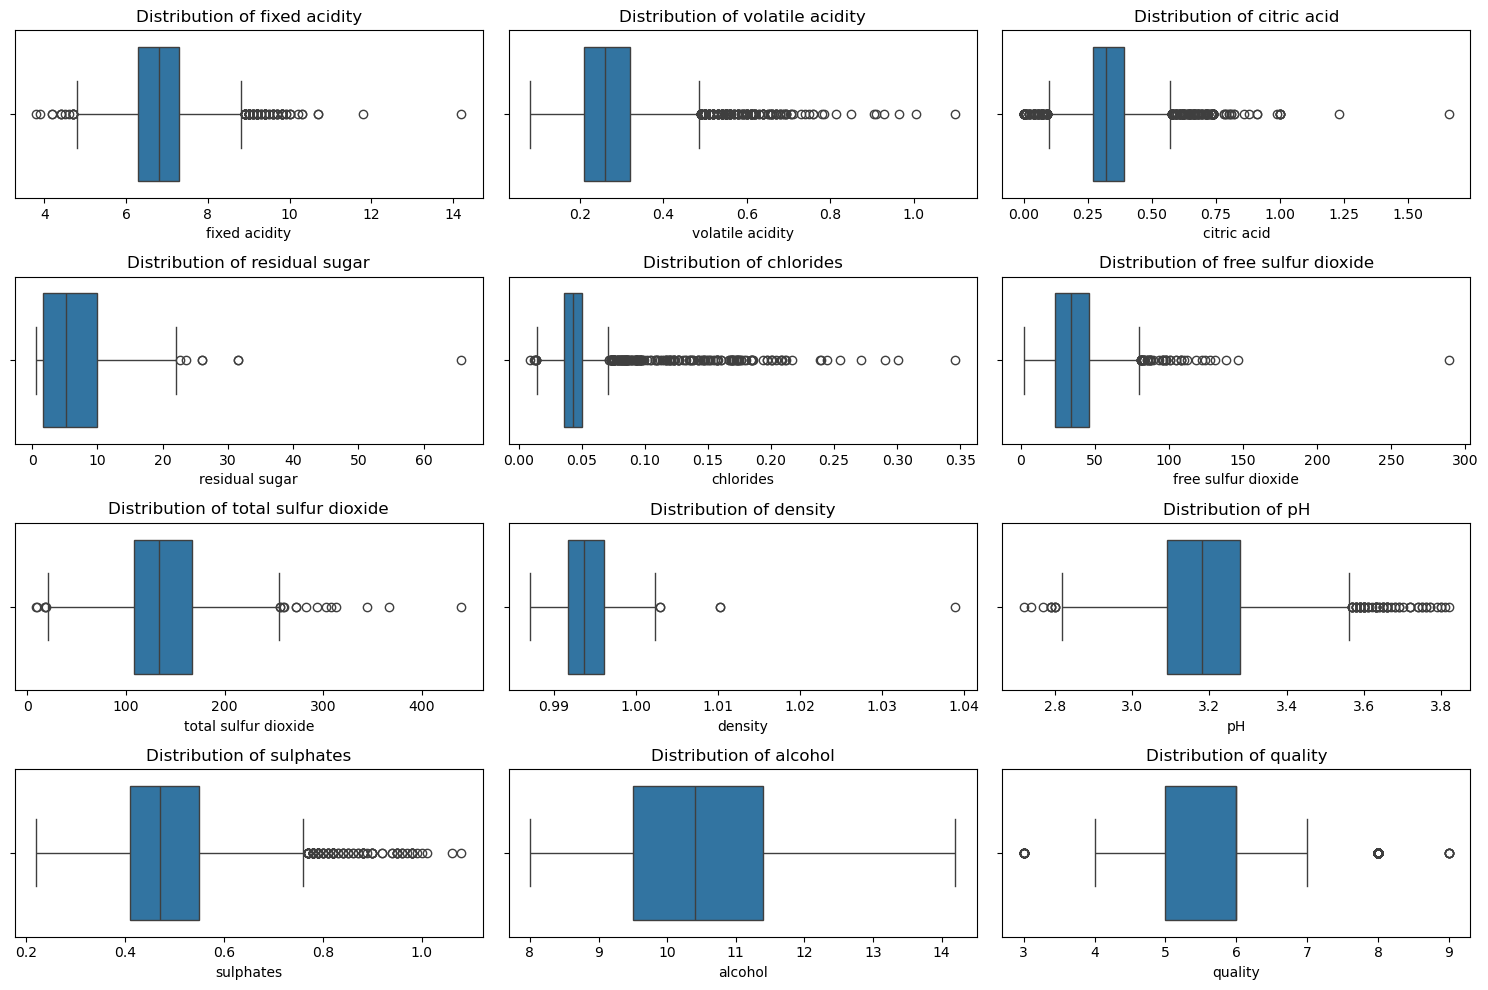

In [14]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
     plt.subplot(4, 3, i+1)
     plt.title(f'Distribution of {col}')
     sns.boxplot(data=df, x=col)
plt.tight_layout()
plt.show()

📊 **Inteprete the result**
- We can see that each of columns has the outliers except `alcohol`
- Columns of `residual sugar`, `free sulfure dioxide`, `density` has outliers that has a single data with extream value
-  The quality feature shows a narrow range of scores, suggesting limited variation in wine quality.

<div style="background-color:white; color:red; font-family:Poppins;  padding:20px 0 20px 15px; font-size:20px; border-radius:15px;">
    Bivariate Analysis
</div>


Bivariate Analysis is Examining relationships between pairs of variables.

### Corelation Matrix


<Axes: >

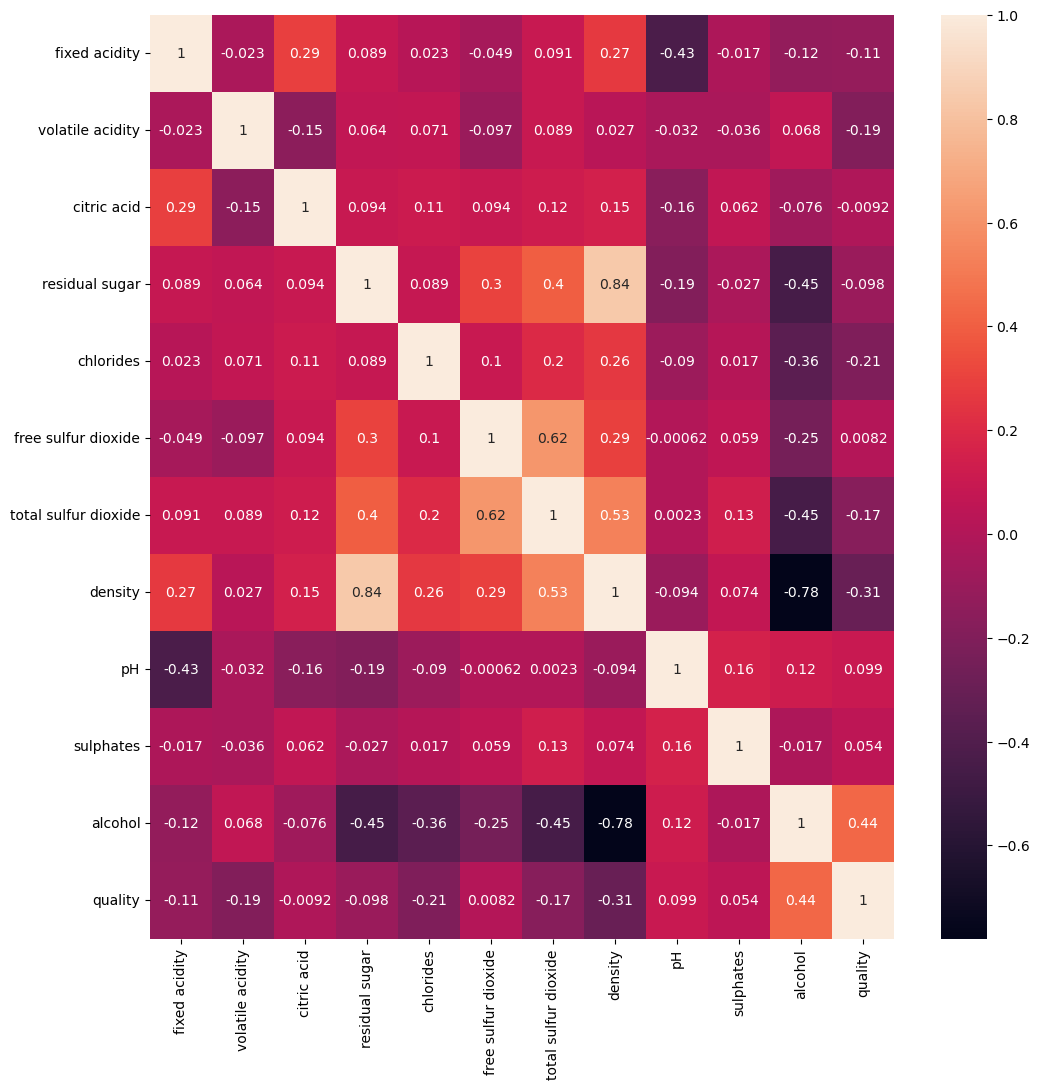

In [15]:
# We want to know the correlation between column so we can focus on some column for analyisis
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)

📊 **Inteprete the result**
- The highest correlation is between `residual` and `density`: 
- The highest correlation is between `desity` and `density`: 
- The `total sulfur dioxide`, `free sulfur dioxide`:

In [16]:
selected_columns = df.select_dtypes(include='number').drop('quality', axis=1).columns
quality_characteristic_mean = df.groupby('quality')[selected_columns].std().reset_index().sort_values('quality')
quality_characteristic_mean

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,1.724743,0.140827,0.081460,5.317332,0.046468,69.420776,107.758331,0.002831,0.209834,0.119845,1.224089
1,4,1.081490,0.173463,0.163857,4.163610,0.025888,20.391349,52.753769,0.002462,0.163691,0.117973,1.003217
2,5,0.838433,0.100066,0.140814,5.327619,0.026496,18.145991,44.086187,0.002545,0.140895,0.098205,0.847065
3,6,0.837442,0.088142,0.119325,5.166625,0.020453,15.735679,41.286220,0.003024,0.150996,0.113357,1.147776
4,7,0.755670,0.091106,0.079183,4.297989,0.010697,13.244737,32.742982,0.002768,0.158402,0.130195,1.246536
5,8,0.819337,0.108029,0.085439,4.263391,0.013164,16.203675,33.006329,0.002788,0.152289,0.147073,1.280138
6,9,0.983362,0.057619,0.082037,3.759255,0.007436,13.427584,19.824228,0.003118,0.082885,0.092628,1.013410


**Checking the quality of characteristic of each feature** 
from the correlation matrix, we want to know the characteristic of all feature to quality

In [17]:
selected_columns = df.select_dtypes(include='number').drop('quality', axis=1).columns
quality_characteristic_mean = df.groupby('quality')[selected_columns].mean().reset_index().sort_values('quality')
quality_characteristic_mean

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
1,4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
2,5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
3,6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
4,7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
5,8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
6,9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


📊 **Inteprete the result**
- More high `quality` of wine decreasing value of `free sulfur dioxide`, `total sulfur dioxide`
- More higer alcohol more higher the quality of wine, although not significanyly linear 
- There is something anomaly on quality 4 proven with mean value in `free sulfur dioxide`, `total sulfur dioxide`

/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_4662/3752144766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='quality', y=col, palette='plasma', errorbar=None)
/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_4662/3752144766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='quality', y=col, palette='plasma', errorbar=None)
/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_4662/3752144766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='quality', y=col, palette='plas

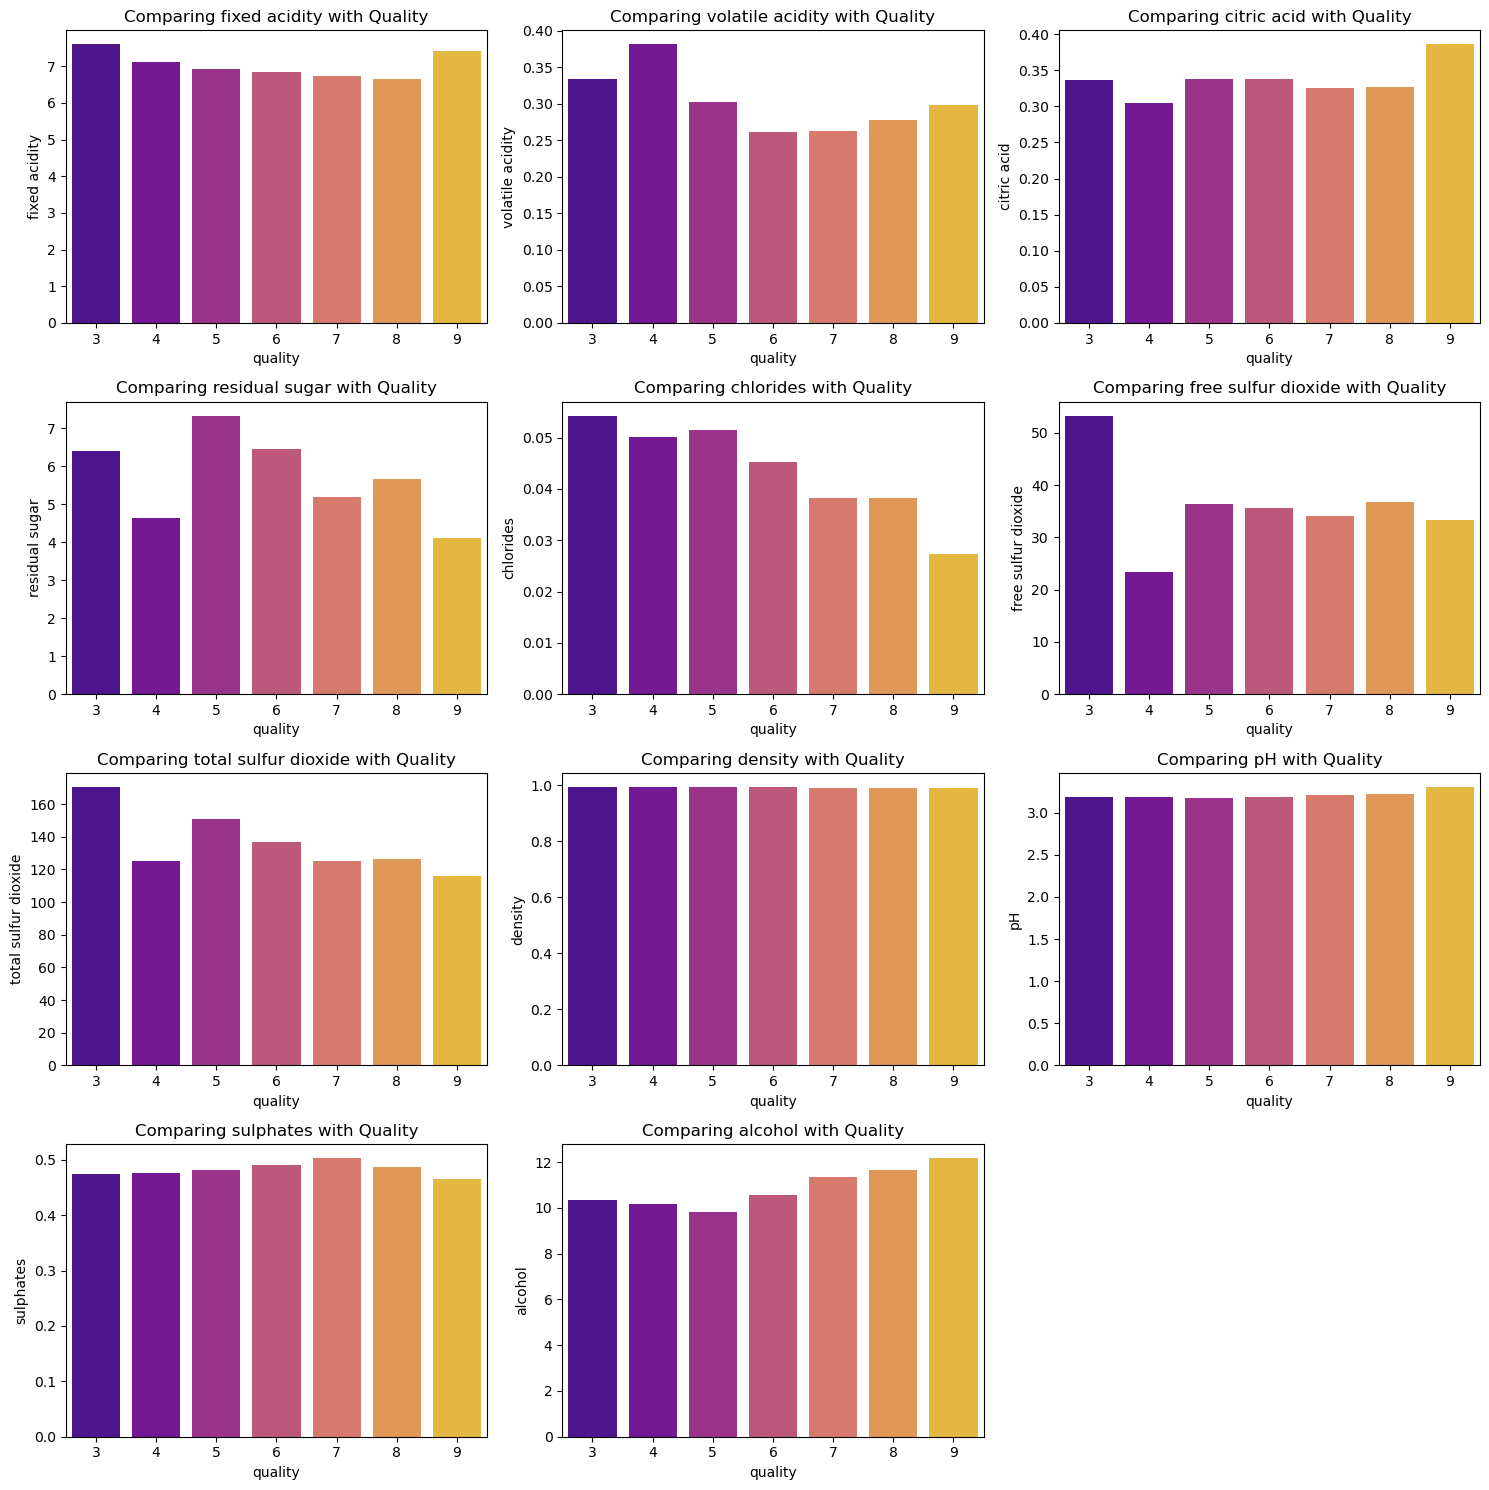

In [18]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(selected_columns):
     plt.subplot(4, 3, i+1)
     plt.title(f'Comparing {col} with Quality')
     sns.barplot(data=df, x='quality', y=col, palette='plasma', errorbar=None)
plt.tight_layout()
plt.show()

📊 **Inteprete the result**
- each quality don't have significant difference in term of the charactistic of `density`, `pH`, `sulphates`
- The highest quality tend to `have less` residual sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide but `more` critic, fixed_acidity
- The lowest quality tend to `have more` residual sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide but `less` critic
- Interestingly, in some columns, there's always fluctuations in quality `4`

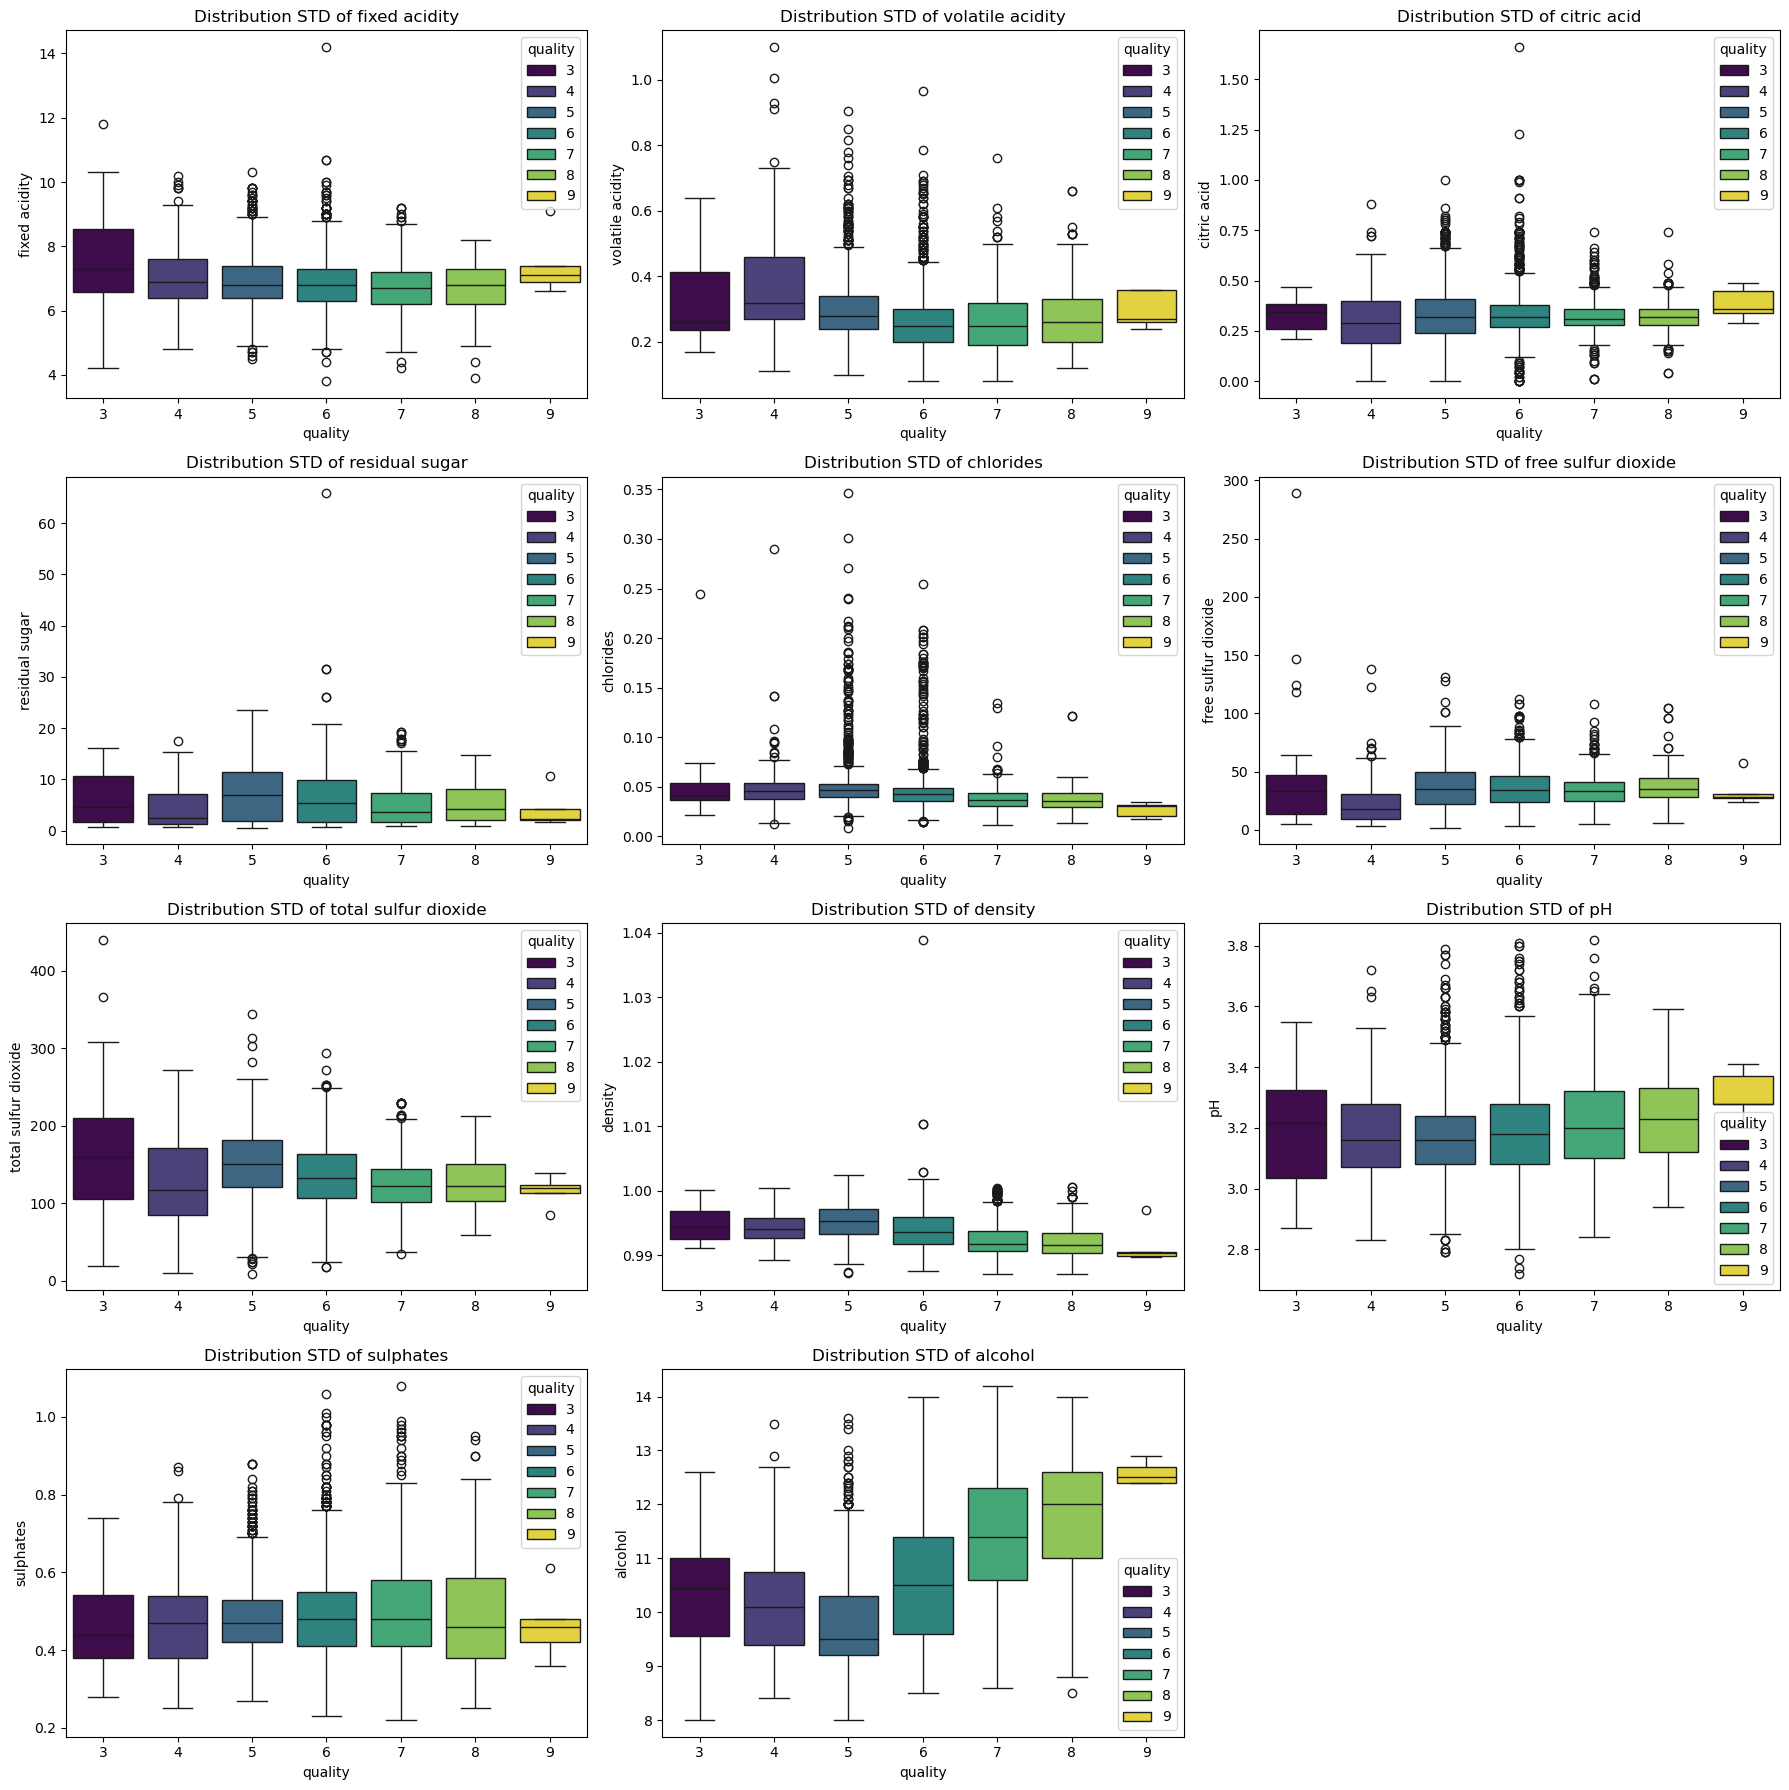

In [19]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(selected_columns):
     plt.subplot(4, 3, i+1)
     plt.title(f'Distribution STD of {col}')
     sns.boxplot(data=df, x='quality', y=col, hue='quality', palette='viridis')
plt.tight_layout()
plt.show()

📊 **Inteprete the result**
- the highest quality of wine has the smallest variation
- volatile acidicity and chlorides have the most outliers

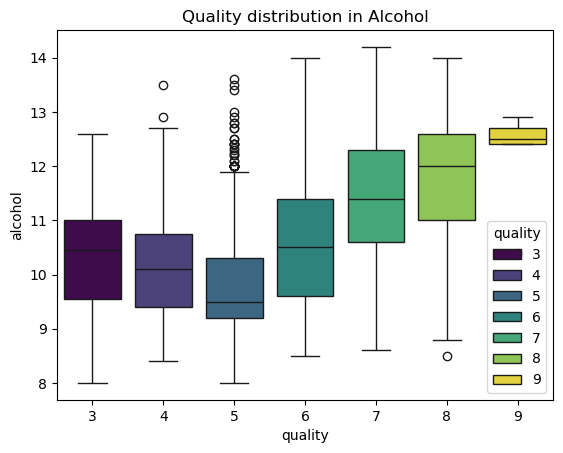

In [20]:
plt.title(f'Quality distribution in Alcohol')
sns.boxplot(data=df, x='quality', y='alcohol', hue='quality', palette='viridis')
plt.show()

other quality has varies level in term of alcohol, except the highest, it is higher in term of alcohol, ranging between above 12.5

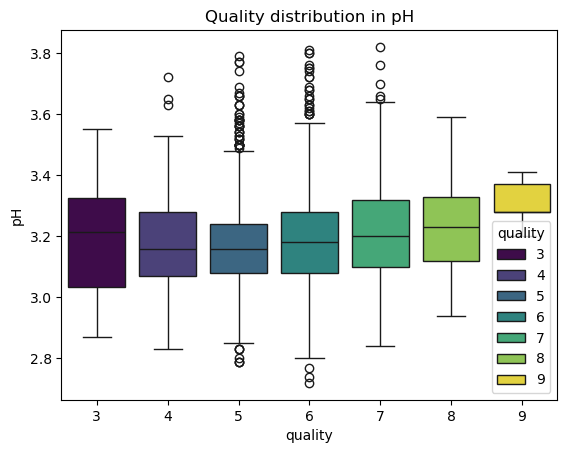

In [21]:
plt.title(f'Quality distribution in pH')
sns.boxplot(data=df, x='quality', y='pH', hue='quality', palette='viridis')
plt.show()

other quality has varies level of pH, except the highest, it is higher in term of pH ranging above 3.3

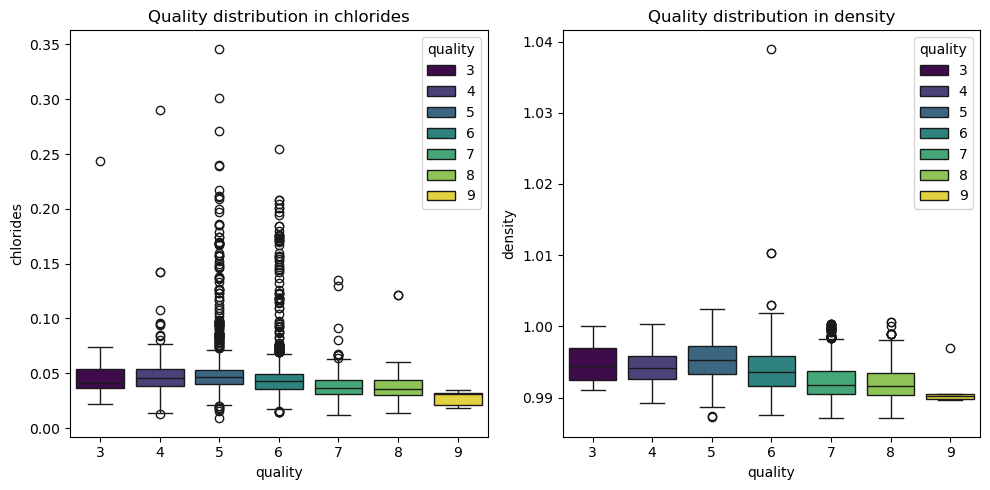

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f'Quality distribution in chlorides')
sns.boxplot(data=df, x='quality', y='chlorides', hue='quality', palette='viridis')

plt.subplot(1, 2, 2)
plt.title(f'Quality distribution in density')
sns.boxplot(data=df, x='quality', y='density', hue='quality', palette='viridis')
plt.tight_layout()
plt.show()

The highest quality has the lowest range in chlorides and density than all

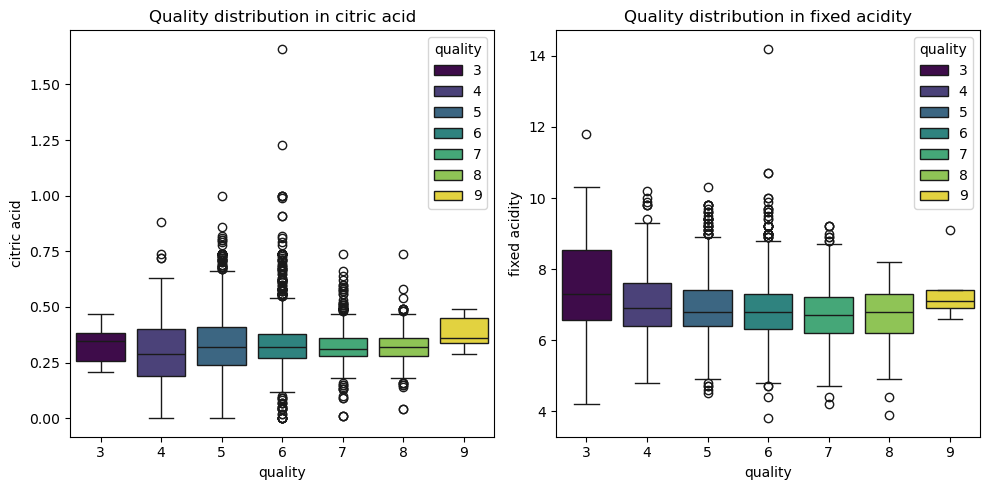

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f'Quality distribution in citric acid')
sns.boxplot(data=df, x='quality', y='citric acid', hue='quality', palette='viridis')

plt.subplot(1, 2, 2)
plt.title(f'Quality distribution in fixed acidity')
sns.boxplot(data=df, x='quality', y='fixed acidity', hue='quality', palette='viridis')
plt.tight_layout()
plt.show()

- the lowest quality varies the most, and is higher in fixed acidity
- the highest quality has higher citric acid than all

<div style="background-color:white; color:red; font-family:Poppins;  padding:20px 0 20px 15px; font-size:20px; border-radius:15px;">
    Multivariate Analysis
</div>


KeyboardInterrupt: 

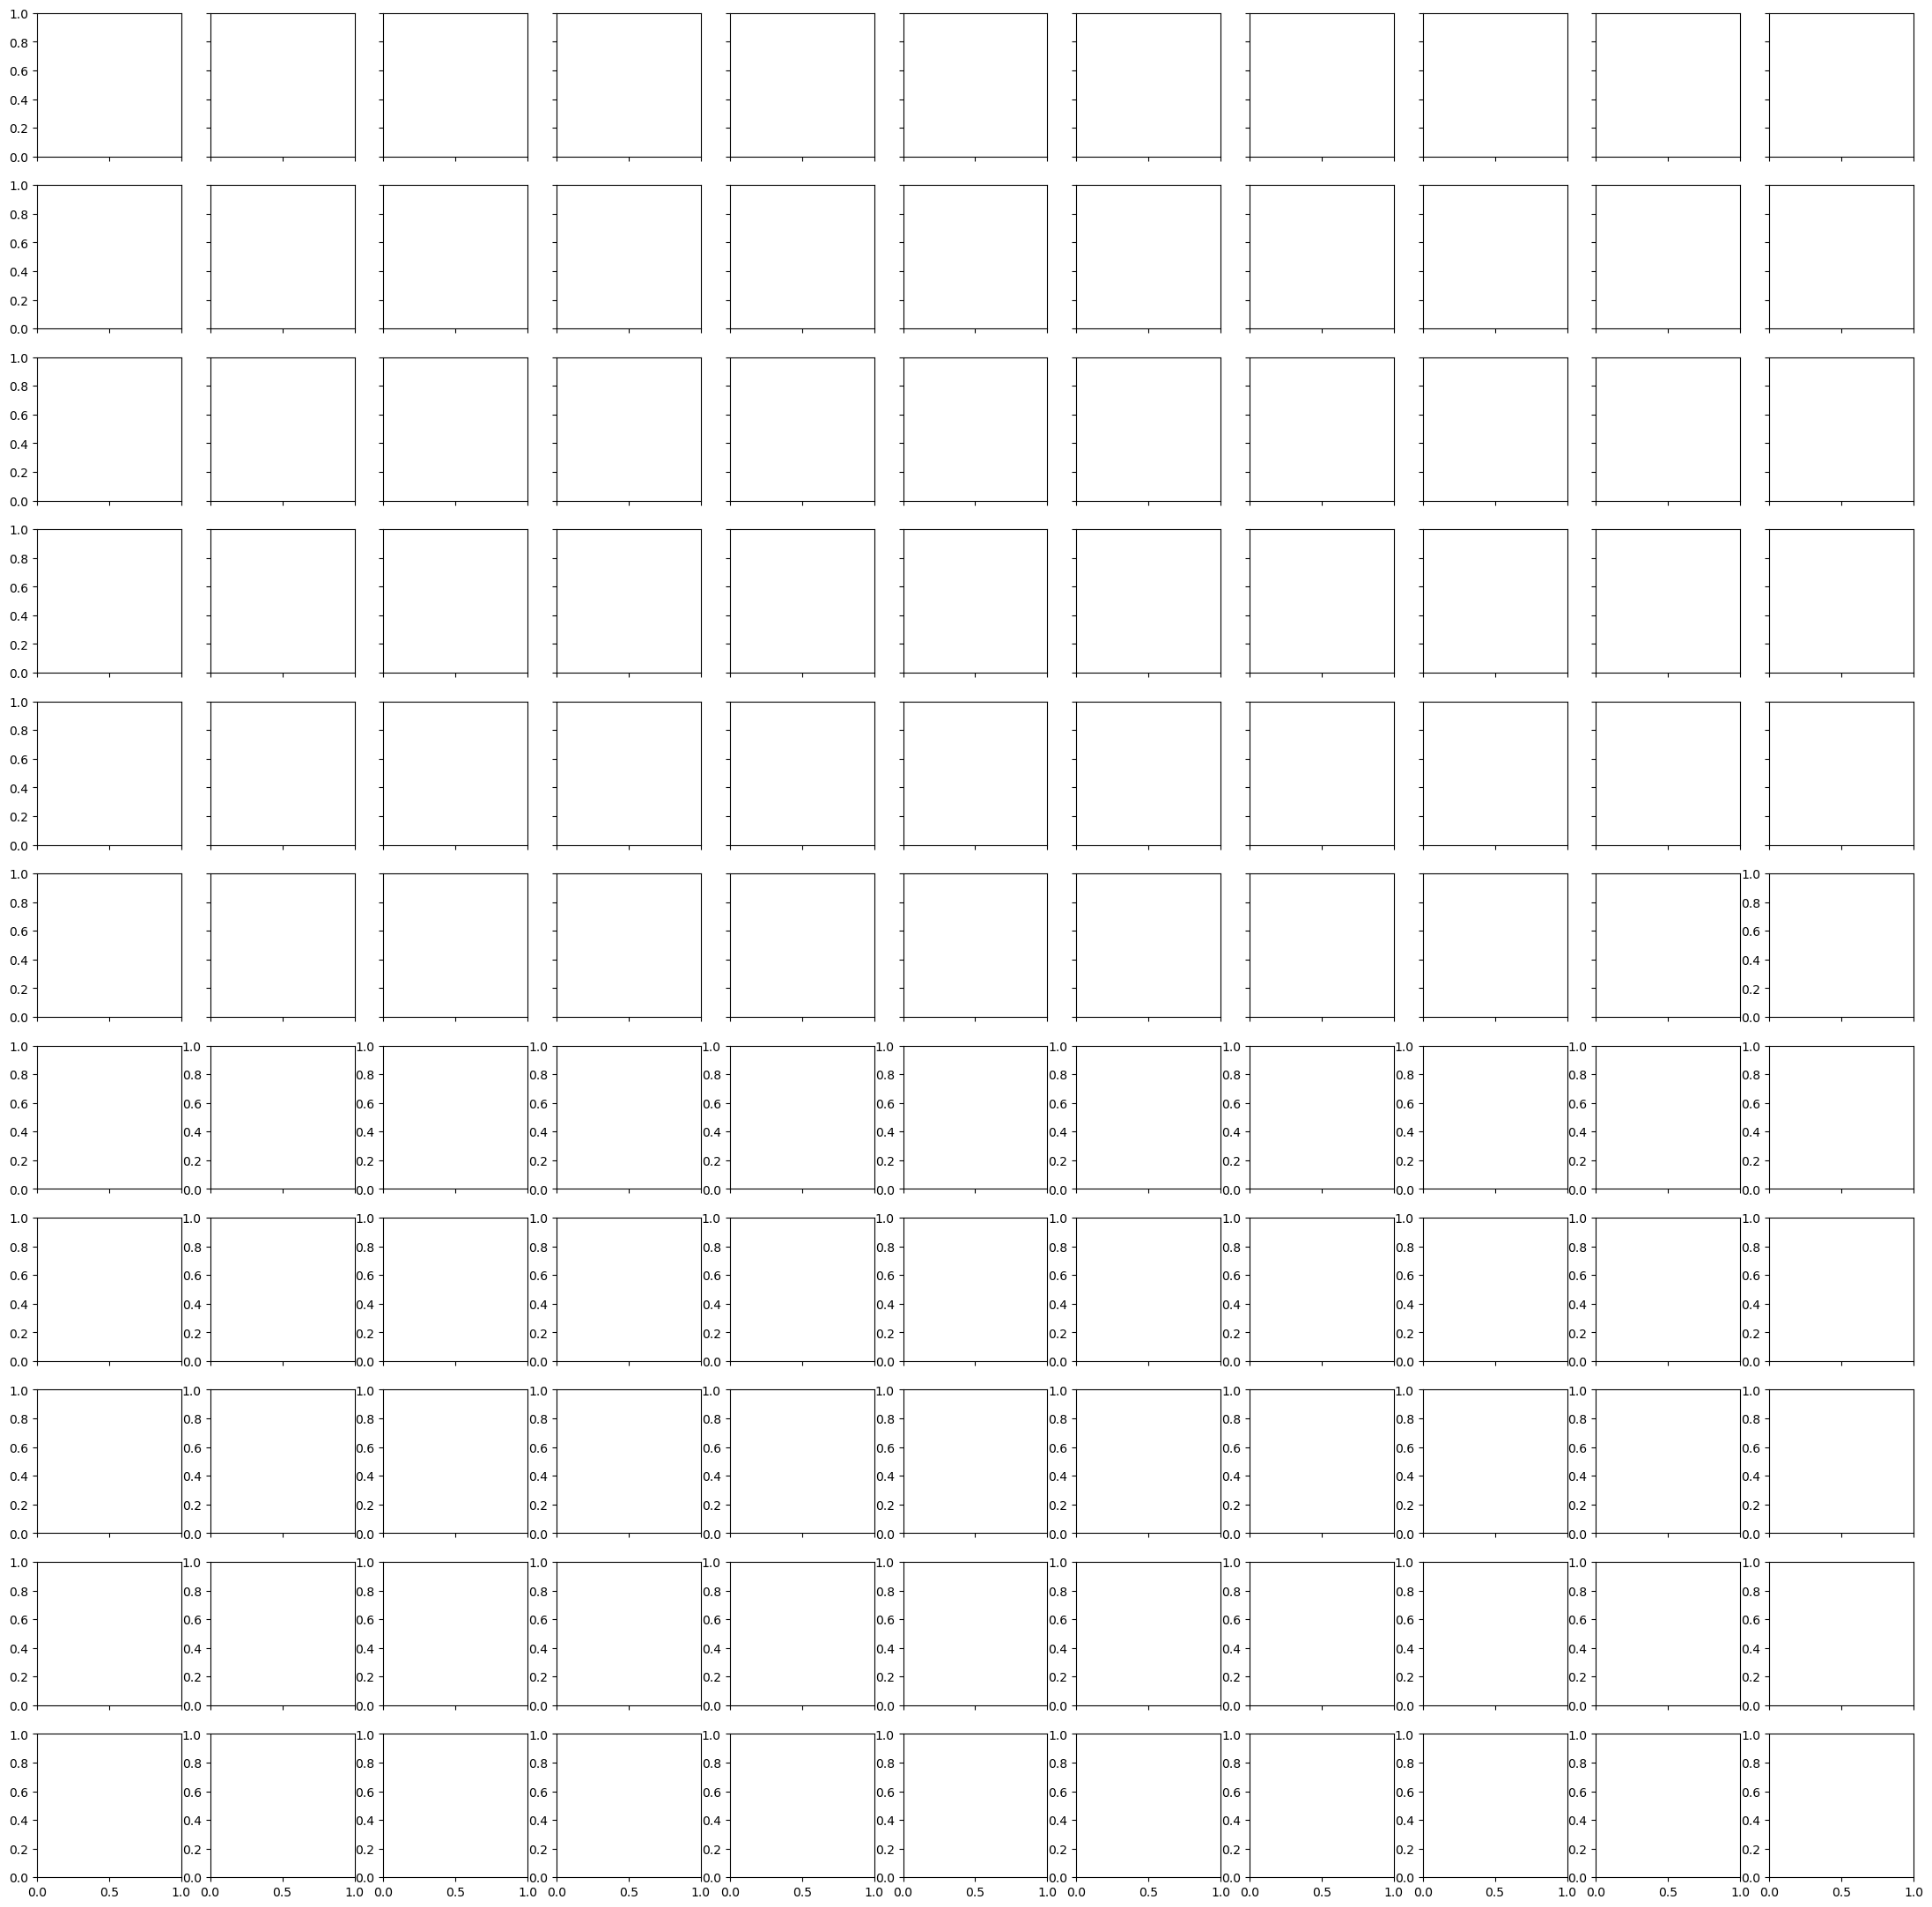

In [24]:
sns.pairplot(data=df,hue='quality', palette='viridis')

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='alcohol', y='residual sugar', z='density', color='quality', 
                    title='3D Scatter Plot', labels={'alcohol': 'Alcohol', 'residual sugar': 'Residual Sugar', 'density': 'Density'})

fig.update_layout(width=800, height=600)  # Set the size of the plot

fig.show()


📊 **Inteprete the result**
- **Insight 1:**
  We can be seen that most of the data points are clustered in the area with `alcohol` content between 10-13% and relatively low `residual sugar`. This suggests that wines with higher `alcohol` content tend to have lower `residual sugar`.
- **Insigt 2:**
  alcohol, `residual`, `sugar`, and `density` can contribute to wine quality. For example, wines with higher alcohol content and lower residual sugar may be preferred in certain `quality` categories.
- **Insigt 3:**
  There appears to be a positive correlation between `alcoho`l content and `density`. As the alcohol content increases, the `density `also tends to increase. This is consistent with the understanding that higher `alcohol` levels contribute to a denser liquid.


<div style="background-color:white; color:red; font-family:Poppins;  padding:20px 0 20px 15px; font-size:20px; border-radius:15px;">
    Summary Insight of the EDA
</div>


#### Understanding Data
- The dataset contains 12 columns and 4898 rows.
- The target variable is `quality`, which is an integer score from 0 to 10.

#### Characteristic Data
- The data types are mostly float, with one integer column (`quality`).
- There are no missing values in the dataset.
- The dataset contains duplicate rows, which account for a small percentage of the data.

#### Outlier Analysis
- Outliers are present in most columns except `alcohol`.
- Columns like `residual sugar`, `free sulfur dioxide`, and `density` have significant outliers.
- Outliers can affect the model's performance and may need to be handled during pre-processing.

#### Univariate Analysis
- Most columns are positively skewed, except for `quality` and `pH`, which have distributions closer to normal.
- Feature scaling and transformation may be necessary to normalize the data distribution.

#### Bivariate Analysis
- High correlation observed between `residual sugar` and `density`.
- `total sulfur dioxide` and `free sulfur dioxide` also show a strong correlation.
- High-quality wines tend to have lower levels of `residual sugar`, `chlorides`, `free sulfur dioxide`, and `total sulfur dioxide`, but higher levels of `citric acid` and `fixed acidity`.

#### Multivariate Analysis
- The highest quality wines have the smallest variation in features.
- Volatile acidity and chlorides have the most outliers.
- High-quality wines have higher alcohol content and pH levels.

<div style="background-color:white; color:red; font-family:Poppins;  padding:20px 0 20px 15px; font-size:20px; border-radius:15px;">
    Impact on Pre-processing
</div>

- **Handling Outliers**: Outliers need to be addressed, either by removing them or using robust scaling techniques.
- **Feature Scaling**: Due to the varying ranges of the features, scaling is necessary to ensure all features contribute equally to the model.
- **Feature Transformation**: Skewed features may need transformation to achieve a normal distribution.
- **Handling Duplicates**: Duplicate rows should be removed to avoid redundancy and potential bias in the model.
- **Feature Selection**: Based on correlation analysis, some features may be more relevant than others and can be selected for modeling.
- **Dimensionality Reduction**: PCA can be used to reduce the feature space while retaining most of the variance.

By addressing these points during pre-processing, the dataset will be better prepared for modeling, leading to potentially improved model performance.

<div style="background-color:red; font-family:Poppins; text-align:center; padding:20px 0 20px 15px; font-size:40px; border-radius:20px;">
    2 | Pre-processing
</div>

- Converting/transforming the dtypes (if necessary)
- Handling Inconsistencies (missing values, duplicates, outliers) by removing/imputation
- Feature addition (if necessary)
- Feature transformation (if the data is biased)
- Feature scaling
- Feature selection
- PCA
- Train test split
- Visualization after handling

14.24

In [ ]:
df.duplicated().sum()

If we have duplicate data accross all the features, then it can biased the models, so the best way to handle it is to remove it

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

nice no duplications, now let's handle outliers, we've got some outliers that are very extreme (very far to the lower bound or upper bound). So there are two suitable way to handle this

1. using median (because it didn't include outliers in the calc)
2. KNN imputer (the train and test doesn't include outliers, we can replace the value with the same characteristic of the labels)

for now let's use median instead

In [28]:
def interquartile(df, col):
     Q1 = df[col].quantile(0.25)
     Q3 = df[col].quantile(0.75)
     IQR = Q3 - Q1 
     lower = Q1 - 1.5 * IQR
     upper = Q3 + 1.5 * IQR
     outliers = df[col][(df[col] < lower) | (df[col] > upper)]
     return outliers

In [ ]:
for col in df.columns:
	outliers = interquartile(df, col)
	print(f'Outliers in {col}: {len(outliers)}')
	indices = list(outliers.index)
	df.loc[indices, col] = np.median(df[col])
	outliers = interquartile(df, col)
	print(f'Outliers after handling {col}: {len(outliers)}\n')
	

notice that some columns still have outliers, we don't have to handle it again, because one iteration is enough to remove the extreme outliers. Those tiny amounts of outliers after handling can give variation to our model later

<div style="background-color:white; color:red; font-family:Poppins;  padding:20px 0 20px 15px; font-size:20px; border-radius:15px;">
    Handling Inconsistensies
</div>

<div style="background-color:red; font-family:Poppins; text-align:center; padding:20px 0 20px 15px; font-size:40px; border-radius:20px;">
    3 | Modeling
</div>

- Kmeans Class: init, _assign_labels, _update_centroids, fit, _inertia, _silhouette
- Elbow method for inertia and _silhouette
- Evaluation Model:
- Clusters distribution
- Cluster characteristic
- Different scenarios output (PCA and non-pca, scaled and non-scaled, etc..)

<div style="background-color:white; color:red; font-family:Poppins;  padding:20px 0 20px 15px; font-size:20px; border-radius:15px;">
    Handling Inconsistensies
</div>

<div style="background-color:red; font-family:Poppins; text-align:center; padding:20px 0 20px 15px; font-size:40px; border-radius:20px;">
    4 | Evaluation Model
</div>

In [169]:
import pandas as pd  
import tkinter as tk  
from tkinter import ttk  
  
class DataFrameApp:  
    def __init__(self, master, dataframe):  
        self.master = master  
        self.dataframe = dataframe  
          
        # Create a Treeview widget  
        self.tree = ttk.Treeview(master, selectmode='browse')  
        self.tree.pack(side='top', fill='both', expand=True)  
  
        # Define columns  
        self.tree['columns'] = list(dataframe.columns)  
        self.tree['show'] = 'headings'  # Hide the first empty column  
  
        # Create headings  
        for col in self.tree['columns']:  
            self.tree.heading(col, text=col)  # Set the column heading  
            self.tree.column(col, anchor='center')  # Center align the column  
  
        # Insert data into the Treeview  
        self.load_data()  
  
        # Bind the click event to toggle checkbox  
        self.tree.bind('<ButtonRelease-1>', self.on_item_click)  
  
    def load_data(self):  
        # Clear existing data  
        for item in self.tree.get_children():  
            self.tree.delete(item)  
  
        # Insert new data  
        for index, row in self.dataframe.iterrows():  
            self.tree.insert('', 'end', iid=index, values=list(row))  
  
    def on_item_click(self, event):  
        # Get the item clicked  
        item = self.tree.selection()  
        if item:  
            # Get the current state of the checkbox  
            current_value = self.dataframe.at[int(item[0]), 'Checked']  
            # Toggle the checkbox state  
            new_value = not current_value  
            self.dataframe.at[int(item[0]), 'Checked'] = new_value  
              
            # Update the Treeview to reflect the checkbox state  
            self.tree.item(item, values=list(self.dataframe.loc[int(item[0])]))  
  
# Sample DataFrame with a checkbox column  
data = {  
    'Checked': [False, False, False],  # Checkbox state  
    'Name': ['Alice', 'Bob', 'Charlie'],  
    'Age': [25, 30, 35],  
    'City': ['New York', 'Los Angeles', 'Chicago']  
}  
df = pd.DataFrame(data)  
  
# Create the main application window  
root = tk.Tk()  
root.title("DataFrame with Checkboxes in Tkinter")  
  
# Create and run the DataFrame application  
app = DataFrameApp(root, df)  
  
# Start the Tkinter event loop  
root.mainloop()  


In [5]:
import tkinter as tk  
from tkinter import messagebox  
  
def show_selection():  
    selected_fruit = fruit_var.get()  
    messagebox.showinfo("Selected Fruit", f"You selected: {selected_fruit}")  
  
# Create the main window  
root = tk.Tk()  
root.title("Fruit Selection")  
  
# Create a variable to hold the selected fruit  
fruit_var = tk.StringVar(value="Apple")  # Default selection  
  
# Create radio buttons  
radio_apple = tk.Radiobutton(root, text="Apple", variable=fruit_var, value="Apple", command=show_selection)  
radio_banana = tk.Radiobutton(root, text="Banana", variable=fruit_var, value="Banana", command=show_selection)  
radio_cherry = tk.Radiobutton(root, text="Cherry", variable=fruit_var, value="Cherry", command=show_selection)  
  
# Pack the radio buttons into the window  
radio_apple.pack(anchor=tk.W)  
radio_banana.pack(anchor=tk.W)  
radio_cherry.pack(anchor=tk.W)  
  
# Start the Tkinter event loop  
root.mainloop()  


In [63]:
import numpy as np
import pandas as pd
import pickle 
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import matplotlib.pyplot as plt  
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg  
from datetime import datetime

HISTORY_FILE = 'history.pkl'

def euclidean_distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2) ** 2))

def minkowski_distance(point1, point2, p=3):
  return np.sum(np.abs(point1 - point2) ** p) ** (1 / p)

def manhattan_distance(point1, point2):
  return np.sum(np.abs(point1 - point2))

def load_history(file_name):
  try:
    with open(file_name, 'rb') as file:
      data = pickle.load(file)
    return pd.DataFrame(data)
  except(FileNotFoundError, EOFError):
    return pd.DataFrame()




class App(tk.Tk):
  def __init__(self):
    super().__init__()
    self.attributes('-fullscreen', True)
    self.sandbox_mode = False  
    self.set_k = 3
    self.set_pca = True
    self.set_scaling = True
    self.set_distance =  euclidean_distance
    
    self.frames = {} 
    self.buttons = {}
      
    for page in ("Predict", "History", "Settings"):
      frame = ttk.Frame(self)
      frame.grid(row=1, column=0, sticky="nsew", padx=50, pady=30)
      self.frames[page] = frame
      
    button_frame = ttk.Frame(self)
    button_frame.grid(row=0, column=0, sticky="ew", padx=50, pady=30)
    for page in self.frames:
      button = tk.Button(button_frame, text=page, bg="black", fg="white", activebackground="white", activeforeground="black", borderwidth=0, command=lambda p=page: self.show_frame(p), padx=50, pady=10, font=("Poppins Medium", 12))  
      button.grid(row=0, column=len(self.buttons), padx=10, pady=10)
      self.buttons[page] = button
      
    tk.Button(button_frame, text="EXIT", bg="red", fg="white", activebackground="white", activeforeground="red", borderwidth=0, command=self.destroy, padx=10, pady=10, font=("Poppins Bold", 12)).grid(row=0, column=len(self.buttons) + 1, padx=10, pady=10)
    
    # ========================================================= SETTING Page ==========================================================================

    self.show_frame("Settings")
    ttk.Label(self.frames["Settings"], text="Get your best model performance", font=("Poppins",32), justify="left").grid(row=0, column=0, padx=0, pady=0, sticky="w")
    ttk.Label(self.frames["Settings"], text="Model was in best performance, turn on sandbox mode to manually adjust ", font=("Poppins",12), justify="left").grid(row=1, column=0, padx=0, pady=0, sticky="w")
    
    def toggle_sandbox(state):
      self.sandbox_mode = state
      if self.sandbox_mode:
        setting_frame.grid()
      else:
        setting_frame.grid_remove()
        self.sandbox_mode = False  
        self.set_k = 3
        self.set_pca = True
        self.set_scaling = True
        self.set_distance =  euclidean_distance

    self.sandbox_var = tk.BooleanVar(value=self.sandbox_mode)
    
    tk.Radiobutton(self.frames["Settings"], text="Sandbox ON", variable=self.sandbox_var, value=True, command=lambda: toggle_sandbox(True)).grid(row=2, column=0, sticky='w')
    tk.Radiobutton(self.frames["Settings"], text="Sandbox OFF", variable=self.sandbox_var, value=False, command=lambda: toggle_sandbox(False)).grid(row=3, column=0, sticky='w')
  
    setting_frame = ttk.Frame(self.frames["Settings"], borderwidth=10, relief='ridge')
    setting_frame.grid(sticky="w", padx=10, pady=10)
    setting_frame.grid_remove()  # Initially hide the setting frame
    
    tk.Label(setting_frame, text="PCA", font=("Poppins", 16), justify="left").grid(row=0, column=0, padx=(0, 80), pady=10, sticky="w")
    tk.Radiobutton(setting_frame, text="Use PCA", variable=self.set_pca, value=True, command=lambda: setattr(self, 'set_pca', True)).grid(row=1, column=0, sticky='w')
    tk.Radiobutton(setting_frame, text="Not Using PCA", variable=self.set_pca, value=False, command=lambda: setattr(self, 'set_pca', False)).grid(row=2, column=0, sticky='w')
    
    tk.Label(setting_frame, text="Set Cluster", font=("Poppins", 16), justify="left").grid(row=5, column=0, padx=(0, 100), pady=10, sticky="w")
    set_k = tk.Entry(setting_frame, font=("Poppins", 8))
    set_k.grid(row=5, column=0, padx=0, pady=(70, 30), sticky="w")
    set_k.insert(0, self.set_k)
    
    ttk.Label(setting_frame, text="Distance", font=("Poppins", 16), justify="left").grid(row=6, column=0, padx=(0, 60), pady=(0, 20), sticky="w")
    selected_var = tk.StringVar(setting_frame, value=self.set_distance)
    
    distance_list = ["manhattan_distance", "euclidean_distance", "minkowski_distance"]
    def update_distance(*args):
      self.set_distance = globals()[selected_var.get()]

    selected_var.trace("w", update_distance)

    set_distance_dropdown = ttk.OptionMenu(setting_frame, selected_var, *distance_list)
    set_distance_dropdown.grid(row=6, column=0, sticky="w", pady=(40, 0))
    
    def plot_scatter():
      fig = plt.Figure(figsize=(6, 4), dpi=100)
      ax = fig.add_subplot(111)
      ax.scatter(df['density'], df['alcohol'], c='r', marker='o')
      ax.set_xlabel('Density')
      ax.set_ylabel('Alcohol')
      self.predict_canvas.draw()
    
    def go_predict():
      save_history(
        set_k=self.set_k, 
        set_pca= self.set_pca, 
        set_scaling=self.set_scaling, 
        set_sandbox=self.sandbox_mode,
        set_distance=self.set_distance.__name__, 
        density=float(entry_Density.get()), 
        alcohol=float(entry_alcohol.get()), 
      )
      update_history()
      
    ttk.Label(self.frames["Predict"], text="Wine Quality Prediction", font=("Poppins", 32), justify="left").grid(row=0, column=0, padx=0, pady=0, sticky="w")
    ttk.Label(self.frames["Predict"], text="Check your quality of wine just by click", font=("Poppins", 15), justify="left").grid(row=1, column=0, padx=0, pady=0, sticky="w")
    
    frame_predict = tk.Frame(self.frames["Predict"], bg="black")
    frame_predict.grid(row=2, column=0, sticky="nsew", padx=10, pady=10)

    entry_alcohol = tk.Entry(frame_predict, font=("Poppins", 12))
    entry_alcohol.grid(row=1, column=0, padx=50, pady=50)
    entry_alcohol.insert(0, 1)
    tk.Label(frame_predict, text="Alcohol", font=("Poppins", 12), fg="white", bg="black").grid(row=1, column=0, padx=50, pady=(0, 70), sticky="w")

    entry_Density = tk.Entry(frame_predict, font=("Poppins", 12))
    entry_Density.grid(row=1, column=2, padx=50, pady=50)
    entry_Density.insert(0, 3)
    tk.Label(frame_predict, text="Density", font=("Poppins", 12), fg="white", bg="black").grid(row=1, column=2, padx=50, pady=(0, 70), sticky="w")
    tk.Button(frame_predict, text="Predict", bg="white", fg="black", activebackground="black", activeforeground="white", command=go_predict, borderwidth=0, padx=50, pady=10, font=("Poppins Medium", 12)).grid(row=1, column=3, padx=50, pady=50)

    fig = plt.Figure(figsize=(6,4), dpi=100)
    ax = fig.add_subplot(111)
    
    frame_predict_right = tk.Frame(self.frames["Predict"])
    frame_predict_right.grid(row=3, column=0, sticky="nsew", padx=10, pady=10)
    
    self.predict_canvas = FigureCanvasTkAgg(fig, master=frame_predict_right)
    self.predict_canvas.get_tk_widget().grid(row=0, column=0, sticky="w", padx=(0, 20), pady=0)
    
    frame_quality_index = tk.Frame(frame_predict_right)
    frame_quality_index.grid(row=0, column=2, sticky="nw", padx=20, pady=20)

    tk.Label(frame_quality_index, text="Wine Quality Index:", font=("Poppins", 20)).grid(row=0, column=0, sticky="nw")
    tk.Label(frame_quality_index, text="3", font=("Poppins", 32)).grid(row=1, column=0, sticky="nw", pady=(0, 20))
    
    # ========================================================= History Page ==========================================================================

    self.show_frame("History") 
    ttk.Label(self.frames["History"], text="Find your latest prediction", font=("Poppins", 32), justify="left").grid(row=0, column=0, padx=0, pady=0, sticky="w")
    ttk.Label(self.frames["History"], text="and compare the performance", font=("Poppins", 18), justify="left").grid(row=1, column=0, padx=0, pady=(0,20), sticky="w")
    
    frame_data_history = tk.Frame(self.frames["History"])
    frame_data_history.grid(row=2, column=0, sticky="w")
    
    scrollbar = tk.Scrollbar(frame_data_history, width=10)
    scrollbar.grid(row=0, column=1, sticky='ns')

    canvas = tk.Canvas(frame_data_history, yscrollcommand=scrollbar.set)
    canvas.grid(row=0, column=0, sticky='w')

    scrollbar.config(command=canvas.yview)

    frame_inside_canvas = tk.Frame(canvas)
    canvas.create_window((0, 0), window=frame_inside_canvas, anchor='nw')

    
    def update_history():
      global df
      df = load_history(HISTORY_FILE)
      for widget in frame_inside_canvas.winfo_children():
        widget.destroy()

      for index, row in df.iterrows():
        tk.Label(frame_inside_canvas, text=f"{index+1}.", font=("Poppins", 12)).grid(row=index, column=0, sticky="w")
        tk.Label(frame_inside_canvas, text=row['timestamp'], font=("Poppins", 12)).grid(row=index, column=1, sticky="w")

      self.checkbox_vars = [tk.BooleanVar() for _ in range(len(df))]

      for index, var in enumerate(self.checkbox_vars):
        tk.Checkbutton(frame_inside_canvas, variable=var, borderwidth=0).grid(row=index, column=2, sticky="w")

      frame_inside_canvas.update_idletasks()
      canvas.config(scrollregion=canvas.bbox("all"))
      
    update_history()

    tk.Button(frame_data_history, text="Update History", bg="black", relief="flat", fg="white", padx=30, font=("Poppins", 12), command=update_history).grid(row=5, column=1, pady=(50,0))

    frame_inside_canvas.update_idletasks()
    canvas.config(scrollregion=canvas.bbox("all"))

    def compare_selected():
      selected_indices = [i for i, var in enumerate(self.checkbox_vars) if var.get()]
      if len(selected_indices) != 2:
        tk.messagebox.showerror("Error", "Please select exactly 2 rows to compare.")
        return

      compare1 = df.iloc[selected_indices[0]]
      compare2 = df.iloc[selected_indices[1]]

      for widget in frame_compare_1.winfo_children():
        widget.destroy()
      for widget in frame_compare_2.winfo_children():
        widget.destroy()

      for col in df.columns:
        tk.Label(frame_compare_1, fg="black", bg="white", text=f"{col}: {compare1[col]}", font=("Poppins", 12)).grid(sticky="w")
        tk.Label(frame_compare_2, fg="black", bg="white", text=f"{col}: {compare2[col]}", font=("Poppins", 12)).grid(sticky="w")

    tk.Button(frame_data_history, text="Compare Selected", bg="black", relief="flat", fg="white", padx=30, font=("Poppins", 12), command=compare_selected).grid(row=5, column=0, pady=(50,0))
    
    frame_compare_1 = tk.Frame(frame_data_history, borderwidth=1, relief="flat", bg="white", padx=30, pady=30)
    frame_compare_1.grid(row=0, column=2, padx=20)
    
    frame_compare_2 = tk.Frame(frame_data_history, borderwidth=1, relief="flat", bg="white", padx=30, pady=30)
    frame_compare_2.grid(row=0, column=3, padx=20)
    
    def save_history(set_k, set_pca, set_scaling, set_distance, set_sandbox, density, alcohol):
      try:
        with open(HISTORY_FILE, "rb") as file:
          data = pickle.load(file)
      except(FileNotFoundError, EOFError):
        data = []
      
      data.append({
        'set_k':set_k,
        'set_pca':set_pca,
        'set_sandbox':set_sandbox,
        'set_distance':set_distance,
        'density':density,
        'alcohol':alcohol,
        'timestamp': datetime.now()
      })

      with open(HISTORY_FILE, 'wb') as file:
        pickle.dump(data, file)
  def show_frame(self, page):
    for p, button in self.buttons.items():
      if p == page:
        button.config(relief="flat")
      else:
        button.config(relief="flat")
    frame = self.frames[page]
    frame.tkraise()
      
app = App()
app.mainloop()


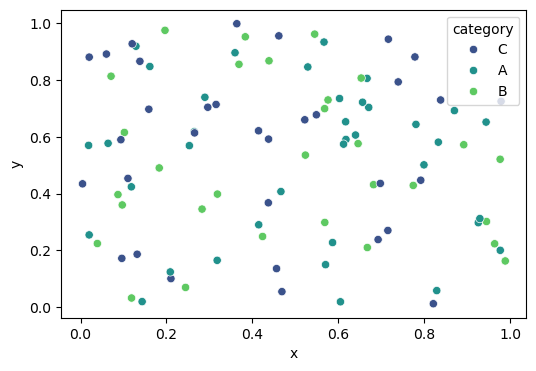

In [60]:
import tkinter as tk  
from tkinter import Frame  
import seaborn as sns  
import matplotlib.pyplot as plt  
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg  
import numpy as np  
import pandas as pd  
  
# Sample data  
np.random.seed(0)  
data = pd.DataFrame({  
    'x': np.random.rand(100),  
    'y': np.random.rand(100),  
    'category': np.random.choice(['A', 'B', 'C'], 100)  
})  
  
# Create the main application window  
root = tk.Tk()  
root.title("Seaborn in Tkinter")  
  
# Create a frame for the plot  
frame = Frame(root)  
frame.pack()  
  
# Create a Seaborn scatter plot  
plt.figure(figsize=(6, 4))  
sns.scatterplot(data=data, x='x', y='y', hue='category', palette='viridis')  
  
# Create a canvas to embed the plot in Tkinter  
canvas = FigureCanvasTkAgg(plt.gcf(), master=frame)  
canvas.draw()  
canvas.get_tk_widget().pack()  
  
# Start the Tkinter main loop  
root.mainloop()  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_scatter(df, labels, centroids):
    # Add labels to the DataFrame
    df['labels'] = labels  # Ensure labels is the same length as the DataFrame

    # Create a new figure
    plt.figure(figsize=(6, 4))

    # Scatter plot for data points
    sns.scatterplot(data=df, x='alcohol', y='density', hue='labels', palette='viridis', alpha=0.7)

    # Scatter plot for centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')

    # Add labels and legend
    plt.xlabel('Alcohol')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()

    # Update the Tkinter canvas
    self.predict_canvas = FigureCanvasTkAgg(plt.gcf(), master=frame_predict_right)
    self.predict_canvas.get_tk_widget().grid(row=0, column=0, sticky="w", padx=(0, 20), pady=0)

# Example usage
# df = pd.DataFrame({'alcohol': [...], 'density': [...]})  # Your data
# labels = [...]  # Cluster labels
# centroids = np.array([[...], [...]])  # Centroids as a NumPy array
# plot_scatter(df, labels, centroids)

In [29]:
import numpy as np  
import pandas as pd  
from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler  
  
# Sample training data  
data_train = np.array([[2.5, 2.4],  
                       [0.5, 0.7],  
                       [2.2, 2.9],  
                       [1.9, 2.2],  
                       [3.1, 3.0],  
                       [2.3, 2.7],  
                       [2, 1.6],  
                       [1, 1.1],  
                       [1.5, 1.6],  
                       [1.1, 0.9]])  
  
# Standardize the data  
scaler = StandardScaler()  
data_train_scaled = scaler.fit_transform(data_train)  
  
# Fit PCA  
pca = PCA(n_components=2)  
pca.fit(data_train_scaled)  
  
# Transform training data  
data_train_pca = pca.transform(data_train_scaled)  
  
# New data  
new_data = np.array([[2.5, 2.4],  
                     [0.5, 0.7]])  
  
# Standardize new data using the same scaler  
new_data_scaled = scaler.transform(new_data)  
  
# Transform new data using the fitted PCA  
new_data_pca = pca.transform(new_data_scaled)  
  
print("Transformed Training Data:\n", data_train_pca)  
print("Transformed New Data:\n", new_data_pca)  


Transformed Training Data:
 [[ 1.08643242 -0.22352364]
 [-2.3089372   0.17808082]
 [ 1.24191895  0.501509  ]
 [ 0.34078247  0.16991864]
 [ 2.18429003 -0.26475825]
 [ 1.16073946  0.23048082]
 [-0.09260467 -0.45331721]
 [-1.48210777  0.05566672]
 [-0.56722643  0.02130455]
 [-1.56328726 -0.21536146]]
Transformed New Data:
 [[ 1.08643242 -0.22352364]
 [-2.3089372   0.17808082]]


In [ ]:
# import tkinter as tk  
# from tkinter import ttk, messagebox  
# import pandas as pd  
# import numpy as np  
# from sklearn.linear_model import LinearRegression  
# import matplotlib.pyplot as plt  
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg  
# import os  
  
# class HousePricePredictorApp:  
#     def __init__(self, root):  
#         self.root = root  
#         self.root.title("House Price Predictor")  
#         self.root.geometry("800x600")  
  
#         # Data storage  
#         self.history = pd.DataFrame(columns=['Size', 'Bedrooms', 'Location', 'Predicted Price'])  
#         self.model = LinearRegression()  
#         self.sandbox_mode = False  
  
#         # Training data  
#         self.X_train = np.array([[1000, 2], [1500, 3], [2000, 4], [2500, 5]])  
#         self.y_train = np.array([300000, 450000, 600000, 750000])  
  
#         # Create tabs  
#         self.tab_control = ttk.Notebook(root)  
#         self.predict_tab = ttk.Frame(self.tab_control)  
#         self.history_tab = ttk.Frame(self.tab_control)  
#         self.settings_tab = ttk.Frame(self.tab_control)  
#         self.tab_control.add(self.predict_tab, text='Predict')  
#         self.tab_control.add(self.history_tab, text='History')  
#         self.tab_control.add(self.settings_tab, text='Settings')  
#         self.tab_control.pack(expand=1, fill="both")  
  
#         # Initialize tabs  
#         self.init_predict_tab()  
#         self.init_history_tab()  
#         self.init_settings_tab()  
  
#     def init_predict_tab(self):  
#         # Input fields  
#         ttk.Label(self.predict_tab, text="Size (sqft):").grid(row=0, column=0, padx=10, pady=10)  
#         self.size_entry = ttk.Entry(self.predict_tab)  
#         self.size_entry.grid(row=0, column=1, padx=10, pady=10)  
  
#         ttk.Label(self.predict_tab, text="Bedrooms:").grid(row=1, column=0, padx=10, pady=10)  
#         self.bedrooms_entry = ttk.Entry(self.predict_tab)  
#         self.bedrooms_entry.grid(row=1, column=1, padx=10, pady=10)  
  
#         ttk.Label(self.predict_tab, text="Location:").grid(row=2, column=0, padx=10, pady=10)  
#         self.location_entry = ttk.Entry(self.predict_tab)  
#         self.location_entry.grid(row=2, column=1, padx=10, pady=10)  
  
#         # Predict button  
#         ttk.Button(self.predict_tab, text="Predict", command=self.predict_price).grid(row=3, column=0, columnspan=2, pady=10)  
  
#         # Accuracy label  
#         self.accuracy_label = ttk.Label(self.predict_tab, text="Accuracy: N/A")  
#         self.accuracy_label.grid(row=4, column=0, columnspan=2, pady=10)  
  
#         # Explanation label  
#         self.explanation_label = ttk.Label(self.predict_tab, text="Explanation: N/A")  
#         self.explanation_label.grid(row=5, column=0, columnspan=2, pady=10)  
  
#         # Plot  
#         self.fig, self.ax = plt.subplots()  
#         self.canvas = FigureCanvasTkAgg(self.fig, master=self.predict_tab)  
#         self.canvas.get_tk_widget().grid(row=6, column=0, columnspan=2, pady=10)  
  
#         # Plot training data  
#         self.plot_training_data()  
  
#     def init_history_tab(self):  
#         # History table  
#         self.history_tree = ttk.Treeview(self.history_tab, columns=('Size', 'Bedrooms', 'Location', 'Predicted Price'), show='headings')  
#         self.history_tree.heading('Size', text='Size (sqft)')  
#         self.history_tree.heading('Bedrooms', text='Bedrooms')  
#         self.history_tree.heading('Location', text='Location')  
#         self.history_tree.heading('Predicted Price', text='Predicted Price')  
#         self.history_tree.grid(row=0, column=0, padx=10, pady=10)  
  
#         # Compare button  
#         ttk.Button(self.history_tab, text="Compare Selected", command=self.compare_selected).grid(row=1, column=0, pady=10)  
  
#     def init_settings_tab(self):  
#         # Sandbox mode toggle  
#         self.sandbox_mode_var = tk.BooleanVar()  
#         ttk.Checkbutton(self.settings_tab, text="Sandbox Mode", variable=self.sandbox_mode_var, command=self.toggle_sandbox_mode).grid(row=0, column=0, padx=10, pady=10)  
  
#         # Model parameters  
#         ttk.Label(self.settings_tab, text="Learning Rate:").grid(row=1, column=0, padx=10, pady=10)  
#         self.learning_rate_entry = ttk.Entry(self.settings_tab)  
#         self.learning_rate_entry.grid(row=1, column=1, padx=10, pady=10)  
  
#         ttk.Label(self.settings_tab, text="Number of Iterations:").grid(row=2, column=0, padx=10, pady=10)  
#         self.iterations_entry = ttk.Entry(self.settings_tab)  
#         self.iterations_entry.grid(row=2, column=1, padx=10, pady=10)  
  
#         # Save settings button  
#         ttk.Button(self.settings_tab, text="Save Settings", command=self.save_settings).grid(row=3, column=0, columnspan=2, pady=10)  
  
#     def plot_training_data(self):  
#         # Plot training data as blue dots  
#         self.ax.scatter(self.X_train[:, 0], self.y_train, color='blue', label='Training Data')  
  
#         # Train model and plot regression line  
#         self.model.fit(self.X_train, self.y_train)  
#         y_pred = self.model.predict(self.X_train)  
#         self.ax.plot(self.X_train[:, 0], y_pred, color='green', label='Regression Line')  
  
#         # Set labels and legend  
#         self.ax.set_xlabel('Size (sqft)')  
#         self.ax.set_ylabel('Price')  
#         self.ax.legend()  
#         self.canvas.draw()  
  
#     def predict_price(self):  
#         try:  
#             size = float(self.size_entry.get())  
#             bedrooms = int(self.bedrooms_entry.get())  
#             location = self.location_entry.get()  
  
#             # Predict  
#             prediction = self.model.predict([[size, bedrooms]])  
  
#             # Add new prediction to history using pd.concat  
#             new_row = pd.DataFrame({'Size': [size], 'Bedrooms': [bedrooms], 'Location': [location], 'Predicted Price': [prediction[0]]})  
#             self.history = pd.concat([self.history, new_row], ignore_index=True)  
  
#             # Update accuracy  
#             self.accuracy_label.config(text=f"Accuracy: {self.model.score(self.X_train, self.y_train):.2f}")  
  
#             # Update explanation  
#             self.explanation_label.config(text=f"Explanation: Size and Bedrooms are the most significant features.")  
  
#             # Update plot with new prediction  
#             self.ax.scatter(size, prediction, color='red', label='Prediction')  
#             self.canvas.draw()  
  
#             # Update history  
#             self.update_history()  
  
#             # Save to CSV  
#             self.save_to_csv(new_row)  
  
#         except ValueError:  
#             messagebox.showerror("Input Error", "Please enter valid numbers for size and bedrooms.")  
  
#     def update_history(self):  
#         for row in self.history_tree.get_children():  
#             self.history_tree.delete(row)  
#         for index, row in self.history.iterrows():  
#             self.history_tree.insert('', 'end', values=(row['Size'], row['Bedrooms'], row['Location'], row['Predicted Price']))  
  
#     def compare_selected(self):  
#         selected_items = self.history_tree.selection()  
#         if len(selected_items) != 2:  
#             messagebox.showerror("Selection Error", "Please select exactly two items to compare.")  
#             return  
  
#         item1 = self.history_tree.item(selected_items[0], 'values')  
#         item2 = self.history_tree.item(selected_items[1], 'values')  
  
#         comparison = f"Comparison:\nItem 1: {item1}\nItem 2: {item2}"  
#         messagebox.showinfo("Comparison", comparison)  
  
#     def toggle_sandbox_mode(self):  
#         self.sandbox_mode = self.sandbox_mode_var.get()  
#         if self.sandbox_mode:  
#             messagebox.showinfo("Sandbox Mode", "Sandbox mode is ON. You can manually adjust settings.")  
#         else:  
#             messagebox.showinfo("Sandbox Mode", "Sandbox mode is OFF.")  
  
#     def save_settings(self):  
#         if self.sandbox_mode:  
#             learning_rate = self.learning_rate_entry.get()  
#             iterations = self.iterations_entry.get()  
#             messagebox.showinfo("Settings Saved", f"Learning Rate: {learning_rate}\nIterations: {iterations}")  
#         else:  
#             messagebox.showerror("Settings Error", "Sandbox mode is OFF. Cannot save settings.")  
  
#     def save_to_csv(self, new_row):  
#         filename = 'house_price_predictions.csv'  
#         if not os.path.exists(filename):  
#             new_row.to_csv(filename, index=False)  
#         else:  
#             new_row.to_csv(filename, mode='a', header=False, index=False)  
  
# if __name__ == "__main__":  
#     root = tk.Tk()  
#     app = HousePricePredictorApp(root)  
#     root.mainloop()  
